# Battery Consumption Analysis

## Jonathan Camenzuli

Source code is part of my Final Year Project in Computer Engineering (2022/23) entitled "Miniature implementation of an IoT-based Smart City"

In [100]:
# Libaries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [101]:
mpl.rcParams['font.family'] = 'Lato'
mpl.rcParams['font.sans-serif'] = 'Lato'

## Fire Detection System

In [102]:
current_fds_df = pd.read_csv('./fds/fds_data.csv')
label_fds_df = pd.read_csv('./fds/timestamps.csv')

In [103]:
# Convert the timestamps to datetime objects
current_fds_df['Time'] = pd.to_datetime(current_fds_df['Time'], format='%H:%M:%S.%f').dt.time
label_fds_df['Timestamps'] = pd.to_datetime(label_fds_df['Timestamps'], format='%H:%M:%S.%f').dt.time

# Remove the decimal point from timestamps
current_fds_df['Time'] = current_fds_df['Time'].apply(lambda x: x.strftime('%H:%M:%S'))
label_fds_df['Timestamps'] = label_fds_df['Timestamps'].apply(lambda x: x.strftime('%H:%M:%S'))

# Merge the dataframes based on the timestamp column
merged_data = pd.merge(current_fds_df, label_fds_df, left_on='Time', right_on='Timestamps', how='left')
print(merged_data)

         Time  Current (mA) Timestamps Labels
0    11:26:48         118.8        NaN    NaN
1    11:26:49         118.0        NaN    NaN
2    11:26:50         117.8        NaN    NaN
3    11:26:51         117.8        NaN    NaN
4    11:26:52         118.6        NaN    NaN
..        ...           ...        ...    ...
475  11:34:55         123.2        NaN    NaN
476  11:34:56         122.2        NaN    NaN
477  11:34:57         124.0        NaN    NaN
478  11:34:58         125.0        NaN    NaN
479  11:34:59         124.0        NaN    NaN

[480 rows x 4 columns]


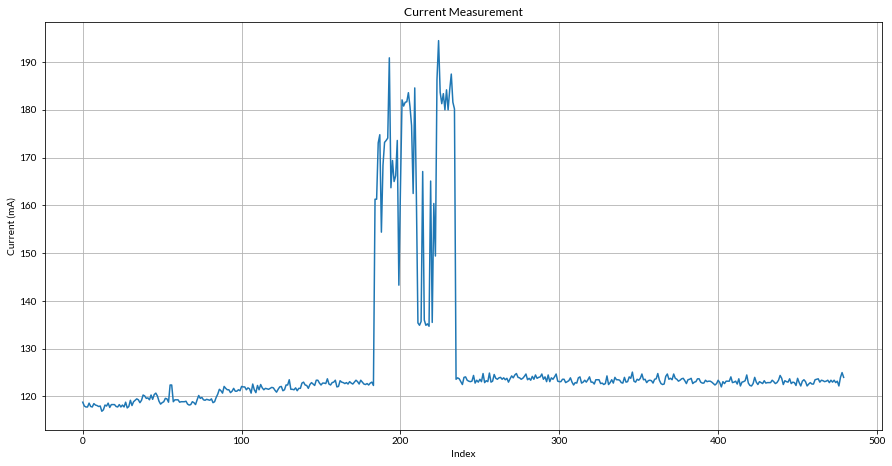

In [104]:
# Create x-axis values
t = np.arange(len(merged_data['Current (mA)']))

# Plot the data
plt.figure(figsize=(15, 7.5))
plt.plot(t, merged_data['Current (mA)'])
plt.xlabel('Index')
plt.ylabel('Current (mA)')
plt.title('Current Measurement')
plt.grid(True)
plt.show()

138
184
185
193


<Figure size 1080x540 with 0 Axes>

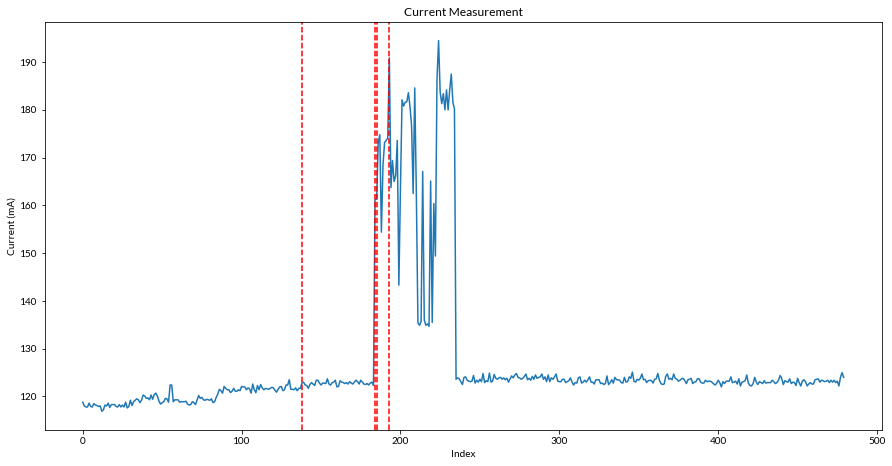

In [105]:
plt.figure(figsize=(15, 7.5))

# Plot the data
plt.figure(figsize=(15, 7.5))
plt.plot(t, merged_data['Current (mA)'])
plt.xlabel('Index')
plt.ylabel('Current (mA)')
plt.title('Current Measurement')
# plt.grid(True)
# plt.show()

# labels_to_plot = merged_data[' Labels'][merged_data[' Labels'].notnull().any()]
# print(labels_to_plot)

for index, row in merged_data.iterrows():
    if not pd.isna(row['Labels']):  # Check if the label is not NaN
        # Plot a vertical line at the corresponding index
        print(index)
        plt.axvline(x=index, color='r', linestyle='--')

plt.show()